In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import math
from scipy.stats import ttest_ind
import pylab
import scipy.stats as stats
from sklearn import datasets, linear_model
%matplotlib inline

In [29]:
cost_df = pd.read_csv('Cost per Ton 2.csv')
cost_df.shape

print(cost_df)

    Year   area 1   area 2   area 3     Napa   area 5   area 6   area 7  \
0   2000  1973.71  1673.17  2417.96  3168.33  1094.04  1306.49  1307.47   
1   2001  2020.11  1722.40  2701.65  3728.56   904.58  1356.09  1252.58   
2   2002  1900.48  1802.72  2694.93  4020.64  1112.31  1361.22  1179.81   
3   2003  1764.95  1689.19  2537.94  4010.85   634.70  1007.42  1152.75   
4   2004  1393.49  1507.51  2397.71  3948.16   701.04   736.05  1083.54   
5   2005  1293.21  1528.53  2322.87  3970.07   762.70   963.01  1000.65   
6   2006  1291.28  1565.19  2265.69  4126.26   578.59   852.09  1008.76   
7   2007  1256.78  1376.33  2237.73  4302.49   703.70  1008.41   927.72   
8   2008  1399.10  1435.31  2321.51  4779.55  1182.27  1136.49   953.38   
9   2009  1340.66  1398.11  2280.67  4772.84  1164.92  1206.63   907.16   
10  2010  1144.39  1287.07  2083.96  4453.09  1178.30  1101.95   848.59   
11  2011  1315.75  1365.78  2111.24  4660.36  1168.33  1283.98   944.25   
12  2012  1589.23  1615.1

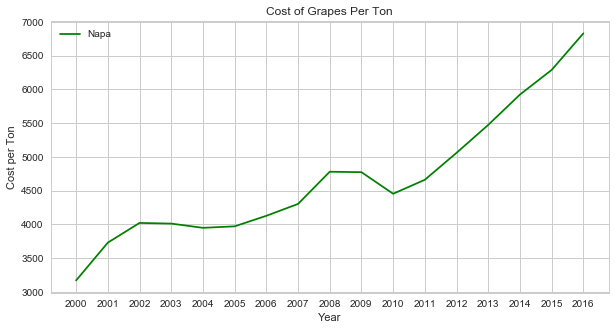

In [30]:
#1 of 4
plt.figure(figsize=(10, 5))
plt.plot(cost_df['Napa'], color = 'green')
dates = Counter(cost_df['Year'])
years = sorted(dates.items(), key=lambda pair: pair[1])
keys = [x[0] for x in years]
x_pos = np.arange(len(keys))
plt.xticks(x_pos, keys)
plt.xlabel('Year')
plt.ylabel('Cost per Ton')
plt.title('Cost of Grapes Per Ton')
plt.legend(loc='upper left') 

plt.show()

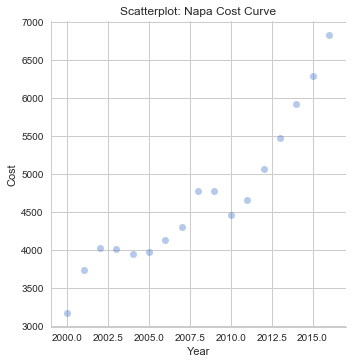

In [31]:
#2 of 4
g = sns.lmplot(y='Napa', 
               x='Year', 
               data=cost_df, 
               fit_reg=False, 
               scatter_kws={'alpha':0.4}) 
g.set_ylabels("Cost")
g.set_xlabels("Year")
sns.plt.title('Scatterplot: Napa Cost Curve')
plt.show()

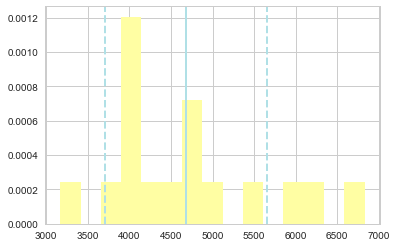

In [32]:

#3 of 4
napa = cost_df['Napa']
plt.hist(cost_df['Napa'], normed=True, bins=15, color='y', label='Napa')
plt.axvline(napa.mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(napa.mean() + napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(napa.mean() - napa.std(), color='c', linestyle='dashed', linewidth=2)

plt.show()

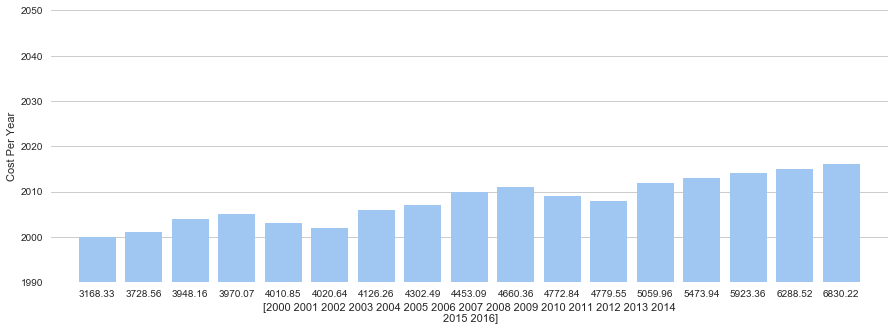

In [33]:
#Mistake
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 5))
sns.set_color_codes("pastel")
sns.barplot(x="Napa", y="Year", data=cost_df,
            label="Total", color="b")
years = np.arange(2000, 2017)
ax.set(xlim=(-1, 17), ylim=(1990,2050), ylabel="Cost Per Year",
       xlabel=years)
sns.despine(left=True, bottom=True)

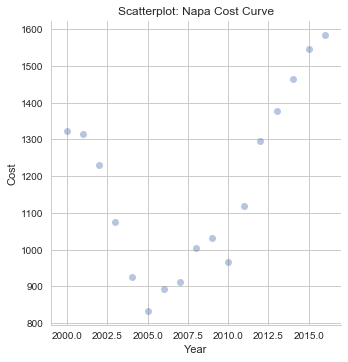

In [34]:
#4 or 4
g = sns.lmplot(y='Paso Robles', 
               x='Year', 
               data=cost_df, 
               fit_reg=False, 
               scatter_kws={'alpha':0.4}) 
g.set_ylabels("Cost")
g.set_xlabels("Year")
sns.plt.title('Scatterplot: Napa Cost Curve')
plt.show()

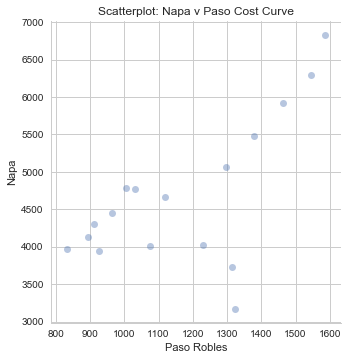

In [35]:
#1 of 3
g = sns.lmplot(y='Napa', # Variable 1.
               x='Paso Robles', # Variable 2.
               data=cost_df, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Napa")
g.set_xlabels("Paso Robles")
sns.plt.title('Scatterplot: Napa v Paso Cost Curve')
plt.show()

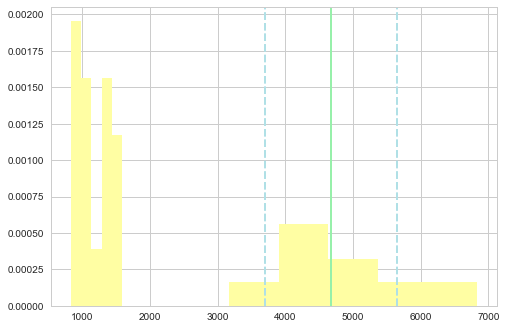

In [36]:
#2 of 3
plt.hist(napa, normed=True, bins=5, color='y', label='Napa')
plt.axvline(napa.mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(napa.mean() + napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(napa.mean() - napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.hist(cost_df['Paso Robles'], normed=True, bins=5, color='y', label='Paso')
plt.axvline(napa.mean(), color='g', linestyle='solid', linewidth=2)
plt.axvline(napa.mean() + napa.std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(napa.mean() - napa.std(), color='c', linestyle='dashed', linewidth=2)

plt.show()

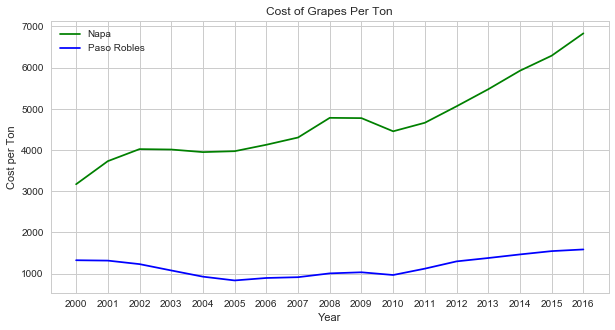

In [37]:
#3 of 3
plt.figure(figsize=(10, 5))
plt.plot(cost_df['Napa'], color = 'green')
plt.plot(cost_df['Paso Robles'], color = 'blue')
dates = Counter(cost_df['Year'])
years = sorted(dates.items(), key=lambda pair: pair[1])
keys = [x[0] for x in years]
x_pos = np.arange(len(keys))
plt.xticks(x_pos, keys)
plt.xlabel('Year')
plt.ylabel('Cost per Ton')
plt.title('Cost of Grapes Per Ton')
plt.legend(loc='upper left') 

plt.show()

In [38]:
movies_df = pd.read_csv('movie_metadata.csv')
movies_df.shape
sample_movies = movies_df[7:199]
color = movies_df.loc[(movies_df['color']=='Color')&(movies_df['duration'] > 0),'duration']
black = movies_df.loc[(movies_df['color']=='Black')&(movies_df['duration'] > 0),'duration']


print(sample_movies)

     color          director_name  num_critic_for_reviews  duration  \
7    Color           Nathan Greno                   324.0     100.0   
8    Color            Joss Whedon                   635.0     141.0   
9    Color            David Yates                   375.0     153.0   
10   Color            Zack Snyder                   673.0     183.0   
11   Color           Bryan Singer                   434.0     169.0   
12   Color           Marc Forster                   403.0     106.0   
13   Color         Gore Verbinski                   313.0     151.0   
14   Color         Gore Verbinski                   450.0     150.0   
15   Color            Zack Snyder                   733.0     143.0   
16   Color         Andrew Adamson                   258.0     150.0   
17   Color            Joss Whedon                   703.0     173.0   
18   Color           Rob Marshall                   448.0     136.0   
19   Color       Barry Sonnenfeld                   451.0     106.0   
20   C

/Users/bryancorder/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


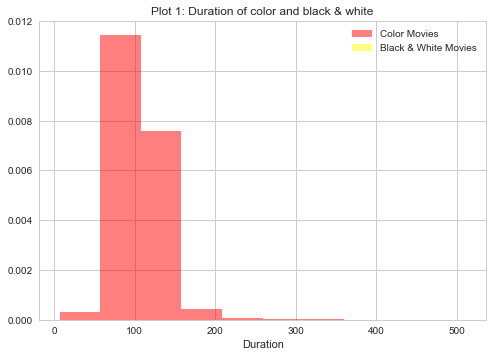

In [39]:
#1 of 6
plt.hist(color, color='red', normed=True, alpha=.5,label='Color Movies') 
plt.hist(black, color='yellow',  normed=True, alpha=.5,label='Black & White Movies')
plt.xlabel('Duration')
plt.legend(loc='upper right')
plt.title('Plot 1: Duration of color and black & white')
plt.show()


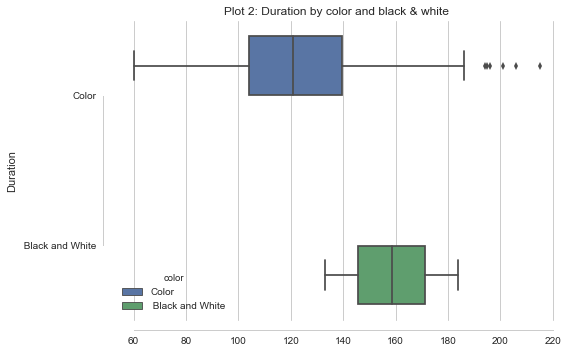

In [40]:
#2 of 6
ax = sns.boxplot(x='duration',y='color',hue='color',data=sample_movies)  
sns.plt.title('Plot 2: Duration by color and black & white')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Duration')

plt.show()

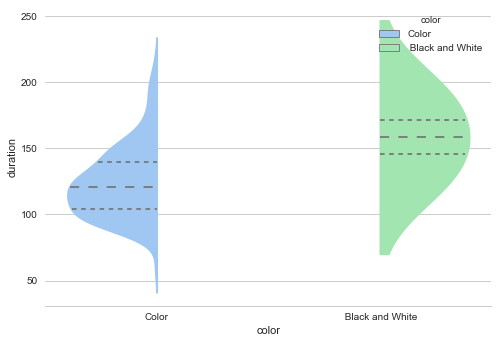

In [41]:
#3 of 6
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="color", y="duration", hue="color", data=sample_movies, split=True,
               inner="quart")
sns.despine(left=True)
plt.show()

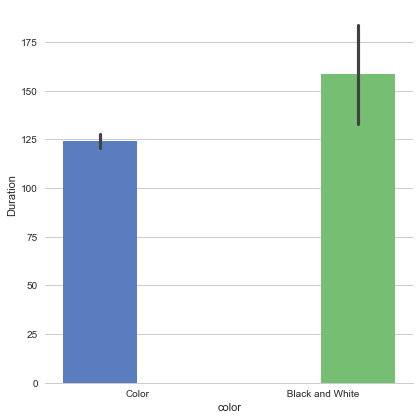

In [42]:
#4 of 6
sns.set(style="whitegrid")
g = sns.factorplot(x="color", y="duration", hue="color", data=sample_movies,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Duration")
plt.show()

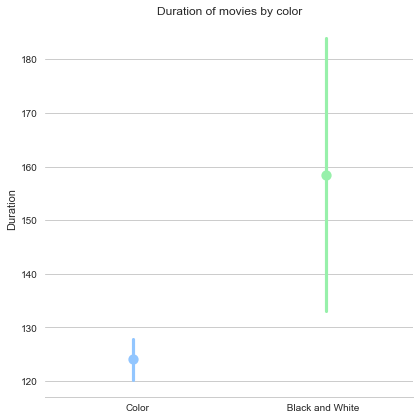

In [43]:
#5 of 6
sns.set(style="whitegrid")

g = sns.factorplot(x="color", y="duration", hue="color", data=sample_movies,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("Duration")
g.set_xlabels("")
sns.plt.title('Duration of movies by color')
plt.show()

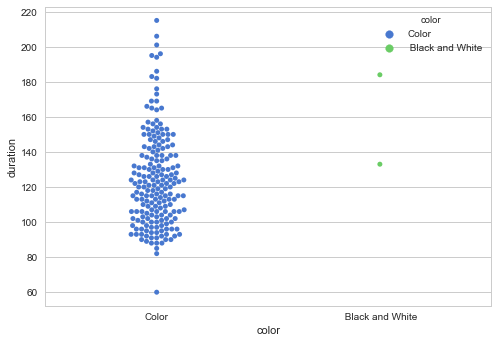

In [44]:
#6 of 6
sns.set(style="whitegrid", palette="muted")
sns.swarmplot(x="color", y="duration", hue="color", data=sample_movies)
plt.show()